In [2]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix

# Randomization
import random

In [3]:
X_train = pd.read_csv(r'C:/Users/ait/Desktop/project/X_train_NHkHMNU.csv')
Y_train = pd.read_csv(r'C:/Users/ait/Desktop/project/y_train.csv')
X_test = pd.read_csv(r'C:/Users/ait/Desktop/project/X_test_final.csv')

In [4]:
X_train.shape

(1494, 35)

In [5]:
Y_train.shape

(1494, 2)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   object 
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1469 non-null   float64
 6   FR_DE_EXCHANGE    1469 non-null   float64
 7   DE_NET_EXPORT     1370 non-null   float64
 8   FR_NET_EXPORT     1424 non-null   float64
 9   DE_NET_IMPORT     1370 non-null   float64
 10  FR_NET_IMPORT     1424 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO          1494 non-null   float64


In [7]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1494 non-null   int64  
 1   TARGET  1494 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 23.5 KB


In [8]:
X_train.isnull().values.any()

True

In [11]:
X_train.isna().sum()

ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
dtype: int64

In [10]:
X_train = X_train.fillna(0)

In [12]:
X_train = X_train.drop('COUNTRY', axis=1)

In [13]:
Y_train.isna().sum()

ID        0
TARGET    0
dtype: int64

In [15]:
Y_train.TARGET.describe()

count    1494.000000
mean        0.089934
std         1.034582
min        -6.519268
25%        -0.219861
50%         0.000000
75%         0.269719
max         7.786578
Name: TARGET, dtype: float64

In [18]:
from sklearn.decomposition import PCA
columns=X_train.columns.values #Store the name of the columns for labeling
pca=PCA(n_components=2)
pca.fit(X_train)
pca_values=pca.components_
pca.components_

array([[-9.99994172e-01,  3.24234764e-03, -2.81657570e-05,
         1.73772133e-05, -2.79306627e-04,  2.79306627e-04,
        -5.54965139e-05,  3.71150750e-04,  5.54965139e-05,
        -3.71150750e-04,  8.34356013e-05, -6.87082173e-05,
        -1.56785499e-04, -3.98954436e-05,  1.65524351e-04,
         2.10859773e-04,  3.51589001e-04,  2.52086123e-04,
        -5.59922737e-05, -1.95020854e-04, -3.74955270e-05,
        -4.17489303e-05, -7.72600154e-05,  4.24993533e-05,
         4.25703103e-05,  2.22924132e-05,  1.65202846e-06,
        -4.06508277e-04, -4.23386247e-04, -4.90428159e-05,
        -7.66651729e-05, -1.95157147e-05,  3.36854789e-07,
        -1.93153113e-05],
       [ 3.24235231e-03,  9.99994653e-01, -3.73877623e-05,
         2.95143329e-05,  6.36392174e-05, -6.36392174e-05,
         1.08340604e-04,  2.46864468e-05, -1.08340604e-04,
        -2.46864468e-05, -1.28190134e-04, -4.99895677e-05,
        -1.54872913e-06, -3.08529400e-06, -1.66643600e-04,
         8.63842261e-05,  8.11

In [19]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

<Figure size 1000x1000 with 0 Axes>

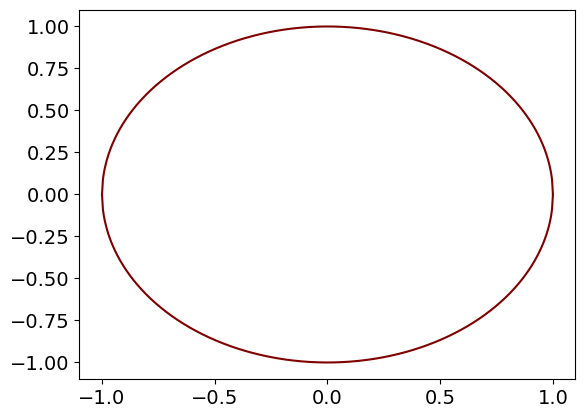

In [20]:
#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
import numpy as np
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

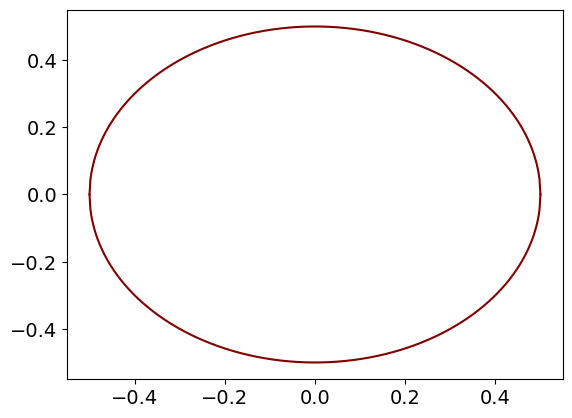

In [21]:
#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

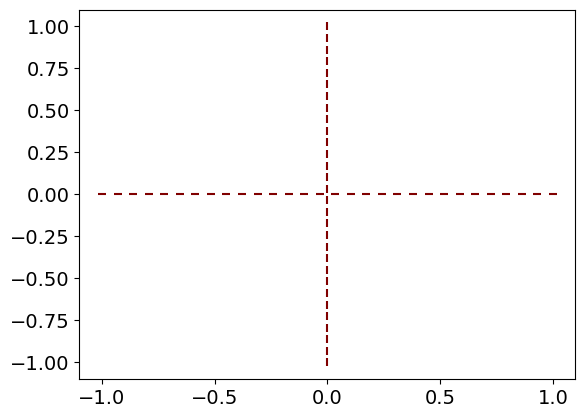

In [23]:
#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

In [24]:
#Define color list
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)

In [17]:
lr = LinearRegression()

X_train_clean = X_train
Y_train_clean = Y_train['TARGET']

lr.fit(X_train_clean, Y_train_clean)

output_train = lr.predict(X_train_clean)

def metric_train(output):

    return  spearmanr(output, Y_train_clean).correlation

print("Corrélation (Spearman) pour les données d'entrainement : {:.1f}%".format(100 * metric_train(output_train) ))

Corrélation (Spearman) pour les données d'entrainement : 27.9%
